# Predicting the 'stock prices' using RNN-GRU

In this file I am building a model which predict the stock prices using RNN GRU. 

For building the model, I have considered the **'trainset.csv'** dataset.

<u>**Following activities performed for predicting the stock prices:**</u>

a) Understanding the problem

b) Collecting the data

c) Data preprocessing

d) Build Model using RNN & Grated Recurrent Unit (GRU)

e) Training the dataset

f) Predict

In [74]:
# importing required libraries

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,GRU,Dense,Dropout
from sklearn.metrics import mean_squared_error
from tensorflow.keras.optimizers import SGD

In [6]:
# reading '.csv' file & converting 'Date' datatype from string to datetime using 'parse_dates'

In [7]:
df=pd.read_csv('trainset.csv',parse_dates=['Date'])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


Getting the information about the datset using the **'df.info()'**

**using df.info() we get information about:**

**a) datatype of each column**
 
**b) no. of records in the dataset**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
Date         1259 non-null datetime64[ns]
Open         1259 non-null float64
High         1259 non-null float64
Low          1259 non-null float64
Close        1259 non-null float64
Adj Close    1259 non-null float64
Volume       1259 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 69.0 KB


In [9]:
# creating 'year' column using 'Date' column

In [10]:
df['year']=df['Date'].dt.year
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500,2013
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500,2013
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800,2013
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900,2013
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900,2013


In [11]:
# setting 'date' column as index 

In [12]:
df.set_index('Date',inplace=True)

**Splitting the data into**

**a) Training data &**

**b) Testing data**

**Training data ---> stock prices w.r.t upto year 2017**

**Testing data  ---> stock prices after year 2017**

In [14]:
# training data has 1008 data points

In [15]:
df1=df[df['year']<2017]
print(df1.shape)

(1008, 7)


In [16]:
# testing data has 251 data points

In [17]:
df2=df[df['year']>=2017]
df2.shape

(251, 7)

In [18]:
# plotting the both train & test data using matplotlib library

Text(0, 0.5, 'stock prices')

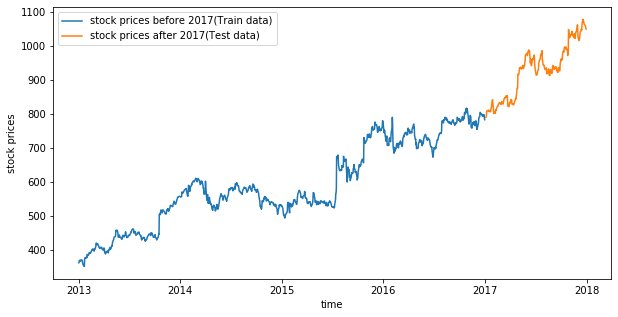

In [20]:
plt.figure(figsize=(10,5))
plt.plot(df1['High'],label='stock prices before 2017(Train data)')
plt.plot(df2['High'],label='stock prices after 2017(Test data)')
plt.legend()
plt.xlabel('time')
plt.ylabel('stock prices')

In [22]:
# for building & training the model for stock price prediction, i am using the column of 'High' 

# During prediction also i am predicting the stock prices of 'High'

In [26]:
x=df['High'].values
x

array([ 361.151062,  363.600128,  368.339294, ..., 1058.369995,
       1054.75    , 1049.699951])

In [29]:
# above 'x' is a 1-d matrix. But Minmaxscalar will take 2-d matrix as input for scaling

# to convert to 1-d to 2-d using --->  '.reshape(-1,1)' (which will convert to 2-d matrix with all values in one row)

# here 'minmaxscalar' scaling the values between 0 to 1. We can scale these values to any range using 'feature_range'

In [28]:
x.reshape(-1,1)

array([[ 361.151062],
       [ 363.600128],
       [ 368.339294],
       ...,
       [1058.369995],
       [1054.75    ],
       [1049.699951]])

In [29]:
minmaxscale=MinMaxScaler()
scaling=minmaxscale.fit_transform(x.reshape(-1,1))
scaling

array([[0.01477823],
       [0.01814187],
       [0.02465083],
       ...,
       [0.9723664 ],
       [0.96739455],
       [0.96045862]])

In [89]:
# for testing purpose i wrote below code

# start of testing code

In [88]:
# scaling[0:60,0] --> using '0' will make the matrix to 1-d array
# without '0' it will be in 2-d array

In [86]:
scaling[0:60]

array([[0.01477823],
       [0.01814187],
       [0.02465083],
       [0.02322487],
       [0.02112347],
       [0.02252214],
       [0.0270593 ],
       [0.02530582],
       [0.02514889],
       [0.02023648],
       [0.01296335],
       [0.00975663],
       [0.00506934],
       [0.        ],
       [0.02978844],
       [0.03513068],
       [0.03625645],
       [0.03429148],
       [0.03521258],
       [0.03794169],
       [0.0356697 ],
       [0.04861942],
       [0.04443703],
       [0.04487369],
       [0.04613593],
       [0.05012728],
       [0.05549002],
       [0.05298603],
       [0.05632922],
       [0.05458941],
       [0.05690231],
       [0.05998626],
       [0.0693608 ],
       [0.0707049 ],
       [0.06830327],
       [0.06543769],
       [0.07032281],
       [0.0618216 ],
       [0.06782566],
       [0.06935397],
       [0.06945632],
       [0.08016817],
       [0.09197846],
       [0.09460526],
       [0.08957   ],
       [0.08841011],
       [0.09167144],
       [0.086

In [87]:
scaling[0:60,0]

array([0.01477823, 0.01814187, 0.02465083, 0.02322487, 0.02112347,
       0.02252214, 0.0270593 , 0.02530582, 0.02514889, 0.02023648,
       0.01296335, 0.00975663, 0.00506934, 0.        , 0.02978844,
       0.03513068, 0.03625645, 0.03429148, 0.03521258, 0.03794169,
       0.0356697 , 0.04861942, 0.04443703, 0.04487369, 0.04613593,
       0.05012728, 0.05549002, 0.05298603, 0.05632922, 0.05458941,
       0.05690231, 0.05998626, 0.0693608 , 0.0707049 , 0.06830327,
       0.06543769, 0.07032281, 0.0618216 , 0.06782566, 0.06935397,
       0.06945632, 0.08016817, 0.09197846, 0.09460526, 0.08957   ,
       0.08841011, 0.09167144, 0.08634283, 0.08552408, 0.08299963,
       0.07843515, 0.07329075, 0.07771876, 0.07653158, 0.07612904,
       0.07498282, 0.07770514, 0.07413678, 0.0693608 , 0.0682487 ])

In [85]:
y=[]
y.append(scaling[0:60])
y

[array([[0.01477823],
        [0.01814187],
        [0.02465083],
        [0.02322487],
        [0.02112347],
        [0.02252214],
        [0.0270593 ],
        [0.02530582],
        [0.02514889],
        [0.02023648],
        [0.01296335],
        [0.00975663],
        [0.00506934],
        [0.        ],
        [0.02978844],
        [0.03513068],
        [0.03625645],
        [0.03429148],
        [0.03521258],
        [0.03794169],
        [0.0356697 ],
        [0.04861942],
        [0.04443703],
        [0.04487369],
        [0.04613593],
        [0.05012728],
        [0.05549002],
        [0.05298603],
        [0.05632922],
        [0.05458941],
        [0.05690231],
        [0.05998626],
        [0.0693608 ],
        [0.0707049 ],
        [0.06830327],
        [0.06543769],
        [0.07032281],
        [0.0618216 ],
        [0.06782566],
        [0.06935397],
        [0.06945632],
        [0.08016817],
        [0.09197846],
        [0.09460526],
        [0.08957   ],
        [0

In [32]:
y=[]
y.append(scaling[0:60,0])
y

[array([0.01477823, 0.01814187, 0.02465083, 0.02322487, 0.02112347,
        0.02252214, 0.0270593 , 0.02530582, 0.02514889, 0.02023648,
        0.01296335, 0.00975663, 0.00506934, 0.        , 0.02978844,
        0.03513068, 0.03625645, 0.03429148, 0.03521258, 0.03794169,
        0.0356697 , 0.04861942, 0.04443703, 0.04487369, 0.04613593,
        0.05012728, 0.05549002, 0.05298603, 0.05632922, 0.05458941,
        0.05690231, 0.05998626, 0.0693608 , 0.0707049 , 0.06830327,
        0.06543769, 0.07032281, 0.0618216 , 0.06782566, 0.06935397,
        0.06945632, 0.08016817, 0.09197846, 0.09460526, 0.08957   ,
        0.08841011, 0.09167144, 0.08634283, 0.08552408, 0.08299963,
        0.07843515, 0.07329075, 0.07771876, 0.07653158, 0.07612904,
        0.07498282, 0.07770514, 0.07413678, 0.0693608 , 0.0682487 ])]

In [90]:
# testing code 'ends' with above line

In [91]:
# for doing the time-series anlysis, we have to consider time-steps

# here we are considering time-step=60 --> i.e for predicting the new value of time-series i.e 61st step, we are using the previous 60steps


In [30]:
# x_train & y_train will have below data

# X_train                         y_train               

# [0-59]                            60
# [1-60]                            61
# [2-61]                            62

# |
# |
# |
# |
# |
# |

# [948-1007]                        1008


# Based on these X_train & y_train --> we will train our model for predicting any unseen data

In [33]:
X_train=[]
y_train=[]

for i in range(60,1008):
    X_train.append(scaling[i-60:i,0])
    y_train.append(scaling[i,0])
print(X_train)
print(y_train)

[array([0.01477823, 0.01814187, 0.02465083, 0.02322487, 0.02112347,
       0.02252214, 0.0270593 , 0.02530582, 0.02514889, 0.02023648,
       0.01296335, 0.00975663, 0.00506934, 0.        , 0.02978844,
       0.03513068, 0.03625645, 0.03429148, 0.03521258, 0.03794169,
       0.0356697 , 0.04861942, 0.04443703, 0.04487369, 0.04613593,
       0.05012728, 0.05549002, 0.05298603, 0.05632922, 0.05458941,
       0.05690231, 0.05998626, 0.0693608 , 0.0707049 , 0.06830327,
       0.06543769, 0.07032281, 0.0618216 , 0.06782566, 0.06935397,
       0.06945632, 0.08016817, 0.09197846, 0.09460526, 0.08957   ,
       0.08841011, 0.09167144, 0.08634283, 0.08552408, 0.08299963,
       0.07843515, 0.07329075, 0.07771876, 0.07653158, 0.07612904,
       0.07498282, 0.07770514, 0.07413678, 0.0693608 , 0.0682487 ]), array([0.01814187, 0.02465083, 0.02322487, 0.02112347, 0.02252214,
       0.0270593 , 0.02530582, 0.02514889, 0.02023648, 0.01296335,
       0.00975663, 0.00506934, 0.        , 0.02978844, 0.03

In [34]:
df.shape

(1259, 7)

In [96]:
1259-60

1199

In [97]:
# x_test & y_test will have below data

# x_test                         y_test               

# [949-1008]                      1009
# [950-1009]                      1010
# [951-1010]                      1011

# |
# |
# |
# |
# |
# |

# [1199-1258]                        1259

In [35]:
X_test=[]
y_test=[]

for i in range(1008,1259):
    X_test.append(scaling[i-60:i,0])
    y_test.append(scaling[i,0])
print(X_test)
print(y_test)

[array([0.59070122, 0.58957499, 0.60292486, 0.60690787, 0.60120806,
       0.59171755, 0.5954671 , 0.59807658, 0.619722  , 0.62382858,
       0.6229633 , 0.61682407, 0.63835959, 0.64041975, 0.62709737,
       0.62230408, 0.63878535, 0.61319817, 0.60307592, 0.5923082 ,
       0.57623894, 0.57680201, 0.59717015, 0.61151297, 0.60546159,
       0.60538329, 0.56364452, 0.55962027, 0.56863833, 0.57130825,
       0.5800159 , 0.58317479, 0.57589558, 0.58586677, 0.57394943,
       0.5694404 , 0.58939652, 0.58798183, 0.58041417, 0.56236715,
       0.55433256, 0.56792965, 0.57470069, 0.57817545, 0.58754232,
       0.60299352, 0.60549319, 0.62352646, 0.62300455, 0.62163111,
       0.61868648, 0.6142969 , 0.61565668, 0.61294551, 0.60833622,
       0.6075396 , 0.61457161, 0.60958601, 0.59818648, 0.59386019]), array([0.58957499, 0.60292486, 0.60690787, 0.60120806, 0.59171755,
       0.5954671 , 0.59807658, 0.619722  , 0.62382858, 0.6229633 ,
       0.61682407, 0.63835959, 0.64041975, 0.62709737, 0.62

In [98]:
# converting from 1-d array to 2-d array

In [37]:
X_train,y_train=np.array(X_train),np.array(y_train)
X_test,y_test=np.array(X_test),np.array(y_test)

In [38]:
X_train.shape, X_test.shape

((948, 60), (251, 60))

In [31]:
# neural network model will take 3-d tensor as input
# so we are converting the 2-d tensor to 3-d tensor using reshape

In [42]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [43]:
X_train.shape,X_test.shape

((948, 60, 1), (251, 60, 1))

In [32]:
# model buidling:

# we are building the 'sequential' model for predicting the stock prices using 'Simple RNN & GRU'

In [46]:
regressorGRU=Sequential()
# layer1
regressorGRU.add(SimpleRNN(20,return_sequences=True,input_shape=(None,1),activation='tanh'))
regressorGRU.add(Dropout(0.2))
# layer2
regressorGRU.add(GRU(20,activation='tanh'))
regressorGRU.add(Dropout(0.2))
# layer3
regressorGRU.add(Dense(1))

In [33]:
# .summary --> will provide details of each layers of model with no. of parameters in it

In [47]:
regressorGRU.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, None, 20)          440       
_________________________________________________________________
dropout (Dropout)            (None, None, 20)          0         
_________________________________________________________________
gru (GRU)                    (None, 20)                2520      
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 21        
Total params: 2,981
Trainable params: 2,981
Non-trainable params: 0
_________________________________________________________________


In [50]:
# Compiling the GRU
regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=20,batch_size=150)

Epoch 1/20
7/7 [==============================] - 4s 34ms/step - loss: 0.1253
Epoch 2/20
7/7 [==============================] - 0s 29ms/step - loss: 0.0303
Epoch 3/20
7/7 [==============================] - 0s 28ms/step - loss: 0.0129
Epoch 4/20
7/7 [==============================] - 0s 27ms/step - loss: 0.0085
Epoch 5/20
7/7 [==============================] - 0s 29ms/step - loss: 0.0070
Epoch 6/20
7/7 [==============================] - 0s 26ms/step - loss: 0.0062
Epoch 7/20
7/7 [==============================] - 0s 26ms/step - loss: 0.0047
Epoch 8/20
7/7 [==============================] - 0s 29ms/step - loss: 0.0041
Epoch 9/20
7/7 [==============================] - 0s 26ms/step - loss: 0.0031
Epoch 10/20
7/7 [==============================] - 0s 28ms/step - loss: 0.0032
Epoch 11/20
7/7 [==============================] - 0s 27ms/step - loss: 0.0029
Epoch 12/20
7/7 [==============================] - 0s 26ms/step - loss: 0.0035
Epoch 13/20
7/7 [==============================] - 0s 28ms/st

In [34]:
# predicting the stock prices using the 'X_test'

In [51]:
y_pred_test=regressorGRU.predict(X_test)
y_pred_test

array([[0.59795535],
       [0.59846354],
       [0.5971886 ],
       [0.5979404 ],
       [0.5982518 ],
       [0.5982983 ],
       [0.60244036],
       [0.60586894],
       [0.61164796],
       [0.6190202 ],
       [0.62306774],
       [0.6246048 ],
       [0.6250411 ],
       [0.6228137 ],
       [0.6235277 ],
       [0.62872964],
       [0.63343304],
       [0.6406275 ],
       [0.6420914 ],
       [0.64031696],
       [0.6325612 ],
       [0.6257687 ],
       [0.6263602 ],
       [0.6287825 ],
       [0.6296892 ],
       [0.62575173],
       [0.620987  ],
       [0.615208  ],
       [0.61373943],
       [0.6150155 ],
       [0.6215341 ],
       [0.6283457 ],
       [0.63363814],
       [0.6386253 ],
       [0.641747  ],
       [0.6428901 ],
       [0.64538336],
       [0.646562  ],
       [0.64842   ],
       [0.65224075],
       [0.65296936],
       [0.65552807],
       [0.651515  ],
       [0.6461139 ],
       [0.64407957],
       [0.644914  ],
       [0.65093344],
       [0.656

In [52]:
y_pred_test.shape

(251, 1)

In [58]:
y_test.shape

(251,)

In [54]:
X_test.shape

(251, 60, 1)

In [35]:
# predicted stock prices are in 'scaled format'

# we have to convert it to 'unscaled format' for performing the below tasks

# a) comparing the metrics with the 'y_actuals'
# b) for plotting

In [72]:
y_pred_test_normal=minmaxscale.inverse_transform(y_pred_test)
y_pred_test_normal

array([[ 785.7617 ],
       [ 786.1317 ],
       [ 785.2034 ],
       [ 785.7508 ],
       [ 785.97754],
       [ 786.0114 ],
       [ 789.0272 ],
       [ 791.52356],
       [ 795.73126],
       [ 801.099  ],
       [ 804.046  ],
       [ 805.16516],
       [ 805.48285],
       [ 803.861  ],
       [ 804.38086],
       [ 808.1684 ],
       [ 811.59296],
       [ 816.83124],
       [ 817.8971 ],
       [ 816.60516],
       [ 810.9582 ],
       [ 806.0126 ],
       [ 806.44324],
       [ 808.2069 ],
       [ 808.8671 ],
       [ 806.00024],
       [ 802.531  ],
       [ 798.32336],
       [ 797.254  ],
       [ 798.18317],
       [ 802.9294 ],
       [ 807.8889 ],
       [ 811.7423 ],
       [ 815.3734 ],
       [ 817.64636],
       [ 818.47864],
       [ 820.294  ],
       [ 821.15216],
       [ 822.50494],
       [ 825.28687],
       [ 825.8173 ],
       [ 827.68036],
       [ 824.7584 ],
       [ 820.82587],
       [ 819.3447 ],
       [ 819.9522 ],
       [ 824.33496],
       [ 828.

In [36]:
# plotting the 'y_predicted' & 'y_actual' of 'X_test' in one plot

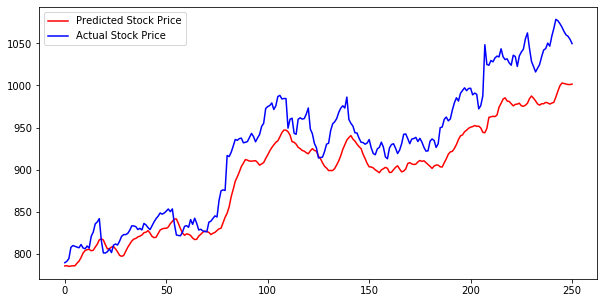

In [71]:
plt.figure(figsize=(10,5))
plt.plot(y_pred_test_normal,color='red',label='Predicted Stock Price')
plt.plot(df['High'][1008:1259].values,color='blue',label='Actual Stock Price')
plt.legend()

**Conclusion:**

1) Time-series analysis can be done using:

   a) ARIMA
   
   b) RNN
   
2) Based on the scientific data, it was proved that RNN model performs better compared to ARIMA model for Time-series analysis

3) Above model is built based on the 'Google stock prices' & it can be extended to any stock prices prediction

4) In the above model, I have considered with less layers & less no. of neurons in each layer. These are hyper-parameters. It can be changed accordingly for getting the better accuracy.

5) This file gives better insights how to do time-series analysis using RNN.